# Week 8

Hey gang. **We made it**. It's the last of the lectures and we're getting ready to move into the project phase. The project is where you take all the stuff you've learned and analyze you own data. Normally, I'd talk about it in class, but since we're on lockdown, I've made a friendly video. Check it out below. 

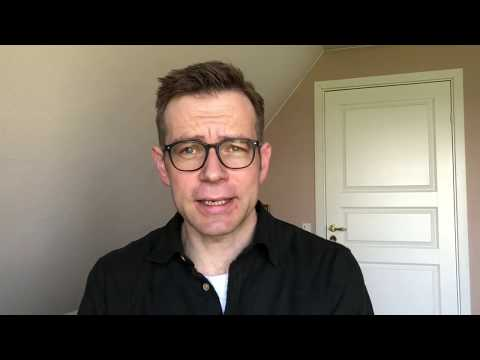

In [1]:
# sune explains the final project
from IPython.display import YouTubeVideo
YouTubeVideo("cynJeZN9vvM",width=800, height=450)

The purpose of today's lecture is to dig into *interactive dataviz*. Being able to play with the data: Toggle the view. Zoom. Drag. Show more details. All those things. Those are a key part of modern data visualization. 

To really master interactive visualizations, you should check out methods in JavaScript, especially [D3](https://d3js.org). Given that we only have 5ECTS for this class, we don't have time for that. But luckily Python has some pretty good options for interactive visualizations. 

Today we'll explore [`Bokeh`](https://docs.bokeh.org/en/latest/), which provides lots of nice interactive funtionality to Python. So the program for today is

* Finish up reading on narrative dataviz (Part 1)
* Create two interactive visualizaitons of our good old crime data (Parts 2 and 3)
* (And an optional viz if you felt the two first ones were too easy. Find that in part 4)



## Part 1 More on narrative data visualization

*Reading*. More on Narrative Visualization.
* Edward Segel and Jeffrey Heer. [Narrative Visualization: Telling Stories with Data](http://vis.stanford.edu/files/2010-Narrative-InfoVis.pdf), section 4-6.

And a fantastic example of narrative dataviz is the story of the start of the virus shown in this week's NYT. Check it out below
* https://www.nytimes.com/interactive/2020/03/22/world/coronavirus-spread.html

> *Exercise*: Questions to the text
> 
> * What's the point of Figure 7?
> * Use Figure 7 to find the most common design choice within each category for the Visual narrative and Narrative structure (the categories within visual narrative are 'visual structuring', 'highlighting', etc).
> * Check out Figure 8 and section 4.3. What is your favorite genre of narrative visualization? Why? What is your least favorite genre? Why?
> * Which genre is the "How the virus got out" NYT piece?



## Part 2: Toggling Histograms

Ok. Let's get started. First a general announcement on the data.

> **Announcement**
> * *During this entire lecture we are going to work with the **Crime data***. 
> * *All part uses data for the **period 2010-2018** (remember to filter your data)* 
> * *For info on how to include Bokeh in your notebooks (instead of generating html), please scan through the guide [Bokeh: Using with Jupyter](https://docs.bokeh.org/en/latest/docs/user_guide/jupyter.html#userguide-jupyter-notebook). Come back to this one when you need it*.
> * *We aim to give you a gentle start with Bokeh, but to get a sense of how things work, I suggest you surf the web, find a Bokeh tutorial and scan through it. Also click around a bit in [the official docs](https://docs.bokeh.org/en/latest/docs/user_guide.html#userguide).*


Now, to get you in the mood here's a little gif to illustrate what the goal of this exercise is:

![Movie](https://github.com/suneman/socialdataanalysis2020/blob/master/files/week8_1.gif?raw=true "movie")

Essentially, we are going to to recreate the results from **Week 2** and make an interactive visualisation (shown in the gif). 

### Data prep

A key step is to set up the data right. So for this one, we'll be pretty strict about the steps. The workflow is

1. Take the data for the period of 2010-2018 and group it by hour-of-the-day (see Week 2)
2. We would like to be able to easily compare how the distribution of crimes differ from each other, not absolute numbers, the focus here will be *normalized data*:
  * To normalise data for within a crime category you simply to devide the count for each hour by the total number of this crime type. (To give a concrete example in the `ASSAULT` category, take the number of assault-counts in 1st hour you should devide by the total number ofassaults, then you devide number of assaults in 2nd hour by the total number of assaults and so on)
  *  It will be easiest if you organize your dataframe as shown in [this helpful screenshot](https://github.com/suneman/socialdataanalysis2020/blob/master/files/week8_1_data.PNG?raw=true).

If you've followed these steps, your data should be ready! Take a moment to celebrate. We now follow the [Bokeh guide for categorical data](https://docs.bokeh.org/en/latest/docs/user_guide/categorical.html):

1. First, let's convert our **Pandas Dataframe** to **Bokeh ColumnDataSource**: 
```python
source = ColumnDataSource(your_processed_dataframe)
## it is a standard way to convert your df to bokeh
```
2. We also need to create an empty figure (we will add our stuff here later on). Mini sub-exercise: Find the a guide how to define a figure in Bokeh online. Here is a little help:
```python
p = figure(...., x_range = FactorRange(factors=hours), ...) #p is a standard way to call figures in Bokeh
#make sure to add x_range. In my case hours is a list on the form ['1', '2', '3' ... , '24']
#read up on the FactorRange in the guide
#do not forget to add other attributes to the figure, e.g. title, axis names and so on
```
3. Now we are going to add the bars. In order to do so, we will use **vbar** (see the guide for help):
```python
bar ={} # to store vbars
### here we will do a for loop:
for indx,i in enumerate(focuscrimes):
    bar[i] = p.vbar(x='name_of_the_column_that_contain_hours',  top=i, source= src, 
                    ### we will create a vbar for each focuscrime
                    legend_label=i,  muted_alpha=..., muted = ....) 
#i stands for a column that we use, top=y; we are specifying that our numbers comes from column i
#read up what legend_label, muted and muted_alpha do... you can add more attributes (you HAVE TO)
```
4. The last thing to do is to make your legend interactive and display the figure:
```python
p.legend.click_policy="mute" ### assigns the click policy (you can try to use ''hide'
show(p) #displays your plot
```
5. You will notice that the legend appears in the middle of the figure (and it ocludes some of the data). In order to fix this look into [this guide](https://stackoverflow.com/questions/26254619/position-of-the-legend-in-a-bokeh-plot) as a start. Below are some code snippets that you can use to deal with this problem (but read the guide first):
```python
items = [] ### for the custom legend // you need to figure out where to add it
items.append((i, [bar[i]])) ### figure where to add it
legend = Legend(items=..., location=.....) ## figure where to add it
p.add_layout(...., ...) ## figure where to add it
### if you read the guide, it will make sense
```

Now you should be able to recreate this amazing visualisation :)

In [100]:
# imports
import pandas as pd
import numpy as np
import datetime
import warnings
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from bokeh.models import Legend
from bokeh.plotting import output_file
from bokeh.transform import dodge
from bokeh.palettes import viridis

warnings.simplefilter('ignore')

In [2]:
# Load data
policedata = pd.read_csv(r'C:\Users\Bruger\Desktop\LargeDataFiles\Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

# Insert DateTime variable
policedata['DateTime'] = policedata['Date'] + ' ' + policedata['Time']

# Subselect focus crimes
focuscrimes = ['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT']
policedata['DateTime'] = pd.to_datetime(policedata['DateTime'] , format="%m/%d/%Y %H:%M") 
fcdata = policedata[policedata['Category'].isin(list(focuscrimes))]

In [3]:
# select 2010-2018 data and group by hour-of-the-day
selected_data = policedata[(policedata["DateTime"].dt.year > 2009) & (policedata["DateTime"].dt.year < 2019)]
selected_data['hour_of_the_day'] = selected_data.DateTime.dt.hour

# Normalize data within each crime category and rearrange the category 
hourlycrime = selected_data.groupby(['hour_of_the_day', 'Category']).size() / selected_data.groupby(['Category']).size() # Normalization
hourlycrimedf = hourlycrime.unstack()
hourlycrimedf['hour'] = hourlycrimedf.index
hourlycrimedf = hourlycrimedf.reset_index()

In [44]:
# Enables the figure to be an output in the notebook
output_notebook()

Loading BokehJS ...

In order to make an interactive bar chart for the crime data in the period of 2010 to 2019, the bokeh package is utilized. It should be noted that the data is normalized in relation to the total number of crimes for each category, therefore the figure will illustrate the relative occurence of crimes for each cateogry, rather than the total number of crimes. The process is partitioned into five parts seen in the following code. Each part consists of the following:
1. Cast the data to a broket ColumnDataSource object as this format is what bokeh utilizes.
2. Create the figure object to place the various bar charts for each crime cateogry in.
3. Iterate through the different crime-types and add each as a bar chart to the figure object.
4. Add the legend to the figure
5. Make the legend interactive to the user. Clicking categories in the legend results in showing/hiding whichever category is selected or de-selected.

In [142]:
# 1/5. Cast the data to a Brokeh ColumnDataSource object
source = ColumnDataSource(hourlycrimedf)

In [143]:
# 2/5. Create the figure object
hours = list(map(str, np.array(range(24))))
p = figure(x_range=hours, plot_width = 900, plot_height = 450, title="Hourly relative crimerates in San Fransisco in 2010-2019",
           toolbar_location=None, tools="", x_axis_label = 'Hour of the day', y_axis_label = 'Ratio')

In [144]:
# 3/5. Add bars to the figure object
bar_colors=viridis(len(focuscrimes))
bar = {} # to store vbars
for indx,i in enumerate(focuscrimes):
    bar[i] = p.vbar(x=dodge('hour', 0.5, range=p.x_range),  top = i, source = source, 
                    color = bar_colors[indx], width = 0.6,
                    muted_alpha = 0.6, alpha = 0.8) 

In [145]:
# 4/5 Add legend
items =[]
for i in focuscrimes:
    items.append((i, [bar[i]]))
legend = Legend(items = items, location = (0,-30))
p.add_layout(legend, 'right') 

In [146]:
# 5/5 Make legend interactive and display the plot 
p.legend.click_policy = "hide"
show(p)

The bar chart is useful in determinig which crimes occur at what time during the day. For example by highlighting PROSTITUTION together with STOLEN PROPERTY, it is clear that prostitution is a lot more frequent in the night-time, compared to stolen property which is reported at a more steady pace throughout the day.

When comparing TRESPASS and VEHICLE THEFT it is also clear that trespassing is more common during the early hours of the day, whereas vehicle theft is more frequent in the nighttimes.


## Part 3: Stacked bar charts

Ok. We're on a roll. Let's just do one more. We start once again with a magnificent gif:

![Movie](https://github.com/suneman/socialdataanalysis2020/blob/master/files/week8_2a.gif?raw=true "movie")



Now the idea is to look at which crimes dominate the various districts. So we use stacked barcharts of normalized crime to see how crime types compare in fractional occurrences across SF's precincts. 

Again, we will start with the data. The steps are:
1. Take the data for the period of 2010-2018 and group by precinct (see Week 2)
2. As we are interested in comparing the **fraction** of each crimes across precincts, we will to normalize the data once again:
  * As above, to normalize the data you need to divide number of specific crime in a district by the *total number of crimes in the district*. Thus, to give a concrete example you should devide the number of assaults in Bayview by the total number of crimes in Bayview and so on 
  * Your life will be easier if your dataframe is arranged as [shown is this helpful screenshot](https://github.com/suneman/socialdataanalysis2020/blob/master/files/week8_2_data.PNG?raw=true).

Nice! Now the visualisation, you can use either Bokeh Guide (see the link in the exercise above (Part 2) or [this guide](https://programminghistorian.org/en/lessons/visualizing-with-bokeh):
1. You'll need to repeat the same two steps as in the exercise above (Part 2). In the second step you'll need to include an additional attribute:
```python
p = figure(...., tool=['hover'], ...) #we want to add a hover effect
# you should find a way to display the name of the crime on hover (initially, the hover-tool won't do that)
# see one of the guides or Google
```
2. For this visualisation, we are going to work with **vbar_stack**:
```python
p.vbar_stack(stackers=..., x=..., source=src, ...) ### you need to find what a stacker is
```
3. (Optional) You can see that my hover effect also shows the numbers. Use [this example](https://github.com/bokeh/bokeh/blob/16e87ed63ca1aecaa42e93293f32d936685dcd3e/sphinx/source/docs/user_guide/examples/categorical_bar_stacked_hover.py) to implement a more informative hover. You also might face an issue that HoverTool does not handle the columns with spaces in the name: [this can help](https://github.com/bokeh/bokeh/issues/4796)

And you're done for today. 

## Part 4:  Advanced and optional 

Your mission, should you choose to accept it, is to to implement the figure displayed below

![Movie](https://github.com/suneman/socialdataanalysis2020/blob/master/files/week8_3.gif?raw=true "movie")



A bit more about what the figure shows.
* It's a figure in Bokeh that can change the axes based on the user choice. 
* Districts are the circles. The position of the circle depends on the number of crimes in X-crime and Y-crime (you can either choose a specific year or use whole period). The radius of the circle is related to the total number of crimes in the district


Some hints and comments to guide you: To complete this exercise, you will have to browse througth Bokeh documentation and/or StackOverflow topics
*  I use two Bokeh Tables: first one stores all the results and second one is updated when the selection is made (you can see it on the GIF). To implement an update, you will have to use [CustomJS](https://docs.bokeh.org/en/latest/docs/user_guide/interaction/callbacks.html) method from Bokeh. And a small code snippet:
```python
# Example of the second dataframe
# It is empty at the beggining
df2 = pd.DataFrame({'District':['BAYVIEW','CENTRAL','INGLESIDE','MISSION','NORTHERN','PARK','RICHMOND','SOUTHERN','TARAVAL','TENDERLOIN'],
                    'x':[float('nan')]*10,
                    'y':[float('nan')]*10,
                    'Total': [float('nan')]*10,
                    'Radius': [float('nan')]*10,
                    'Color': ...})
# create source for empty dataframe
src2 = ColumnDataSource(df2)
# create cols
table_columns2 = [TableColumn(field = Ci, title = Ci) for Ci in    df2.columns] 
# Bokeh Table
data_table2 = DataTable(source=src2, columns=table_columns2, width=400)
```

**Huge thanks to TA Germans who has more or less created all three Bokeh exercises, while I've been busy with COVID-19 work.**